# DoorDash ETA Prediction


## Data Loading

In [2]:
# Importing dataset via kaggle

!kaggle datasets download -d dharun4772/doordash-eta-prediction

Dataset URL: https://www.kaggle.com/datasets/dharun4772/doordash-eta-prediction
License(s): MIT
100%|██████████████████████████████████████| 4.99M/4.99M [00:05<00:00, 1.07MB/s]
100%|██████████████████████████████████████| 4.99M/4.99M [00:05<00:00, 1.03MB/s]


In [3]:
# Exporting dataset from zipfile

import zipfile
zip_ref = zipfile.ZipFile('/home/bhxveshhh/DeepLearning/DoorDash ETA Prediction/doordash-eta-prediction.zip', 'r')
zip_ref.extractall('/home/bhxveshhh/DeepLearning/DoorDash ETA Prediction')
zip_ref.close()

## Exploratory Data Analysis

In [20]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

In [21]:
df = pd.read_csv('historical_data.csv')

In [3]:
df.head()

,market_id,created_at,actual_delivery_time,store_id,store_primary_category,order_protocol,total_items,subtotal,num_distinct_items,min_item_price,max_item_price,total_onshift_dashers,total_busy_dashers,total_outstanding_orders,estimated_order_place_duration,estimated_store_to_consumer_driving_duration
0,1.0,2015-02-06 22:24:17,2015-02-06 23:27:16,1845,american,1.0,4,3441,4,557,1239,33.0,14.0,21.0,446,861.0
1,2.0,2015-02-10 21:49:25,2015-02-10 22:56:29,5477,mexican,2.0,1,1900,1,1400,1400,1.0,2.0,2.0,446,690.0
2,3.0,2015-01-22 20:39:28,2015-01-22 21:09:09,5477,NaN,1.0,1,1900,1,1900,1900,1.0,0.0,0.0,446,690.0
3,3.0,2015-02-03 21:21:45,2015-02-03 22:13:00,5477,NaN,1.0,6,6900,5,600,1800,1.0,1.0,2.0,446,289.0
4,3.0,2015-02-15 02:40:36,2015-02-15 03:20:26,5477,NaN,1.0,3,3900,3,1100,1600,6.0,6.0,9.0,446,650.0


In [4]:
df.shape

(197428, 16)

In [5]:
df.size

3158848

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 197428 entries, 0 to 197427
Data columns (total 16 columns):
 #   Column                                        Non-Null Count   Dtype  
---  ------                                        --------------   -----  
 0   market_id                                     196441 non-null  float64
 1   created_at                                    197428 non-null  object 
 2   actual_delivery_time                          197421 non-null  object 
 3   store_id                                      197428 non-null  int64  
 4   store_primary_category                        192668 non-null  object 
 5   order_protocol                                196433 non-null  float64
 6   total_items                                   197428 non-null  int64  
 7   subtotal                                      197428 non-null  int64  
 8   num_distinct_items                            197428 non-null  int64  
 9   min_item_price                                19

In [7]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
market_id,196441.0,2.978706,1.524867,1.0,2.0,3.0,4.0,6.0
store_id,197428.0,3530.510272,2053.496711,1.0,1686.0,3592.0,5299.0,6987.0
order_protocol,196433.0,2.882352,1.503771,1.0,1.0,3.0,4.0,7.0
total_items,197428.0,3.196391,2.666546,1.0,2.0,3.0,4.0,411.0
subtotal,197428.0,2682.331402,1823.093688,0.0,1400.0,2200.0,3395.0,27100.0
num_distinct_items,197428.0,2.670791,1.630255,1.0,1.0,2.0,3.0,20.0
min_item_price,197428.0,686.218470,522.038648,-86.0,299.0,595.0,949.0,14700.0
max_item_price,197428.0,1159.588630,558.411377,0.0,800.0,1095.0,1395.0,14700.0
total_onshift_dashers,181166.0,44.808093,34.526783,-4.0,17.0,37.0,65.0,171.0
total_busy_dashers,181166.0,41.739747,32.145733,-5.0,15.0,34.0,62.0,154.0


In [8]:
df.isnull().sum()

market_id                                         987
created_at                                          0
actual_delivery_time                                7
store_id                                            0
store_primary_category                           4760
order_protocol                                    995
total_items                                         0
subtotal                                            0
num_distinct_items                                  0
min_item_price                                      0
max_item_price                                      0
total_onshift_dashers                           16262
total_busy_dashers                              16262
total_outstanding_orders                        16262
estimated_order_place_duration                      0
estimated_store_to_consumer_driving_duration      526
dtype: int64

In [9]:
df.duplicated().sum()

np.int64(0)

In [10]:
df.nunique()

market_id                                            6
created_at                                      180985
actual_delivery_time                            178110
store_id                                          6743
store_primary_category                              74
order_protocol                                       7
total_items                                         57
subtotal                                          8368
num_distinct_items                                  20
min_item_price                                    2312
max_item_price                                    2652
total_onshift_dashers                              172
total_busy_dashers                                 159
total_outstanding_orders                           281
estimated_order_place_duration                      98
estimated_store_to_consumer_driving_duration      1336
dtype: int64

## Data Visualization

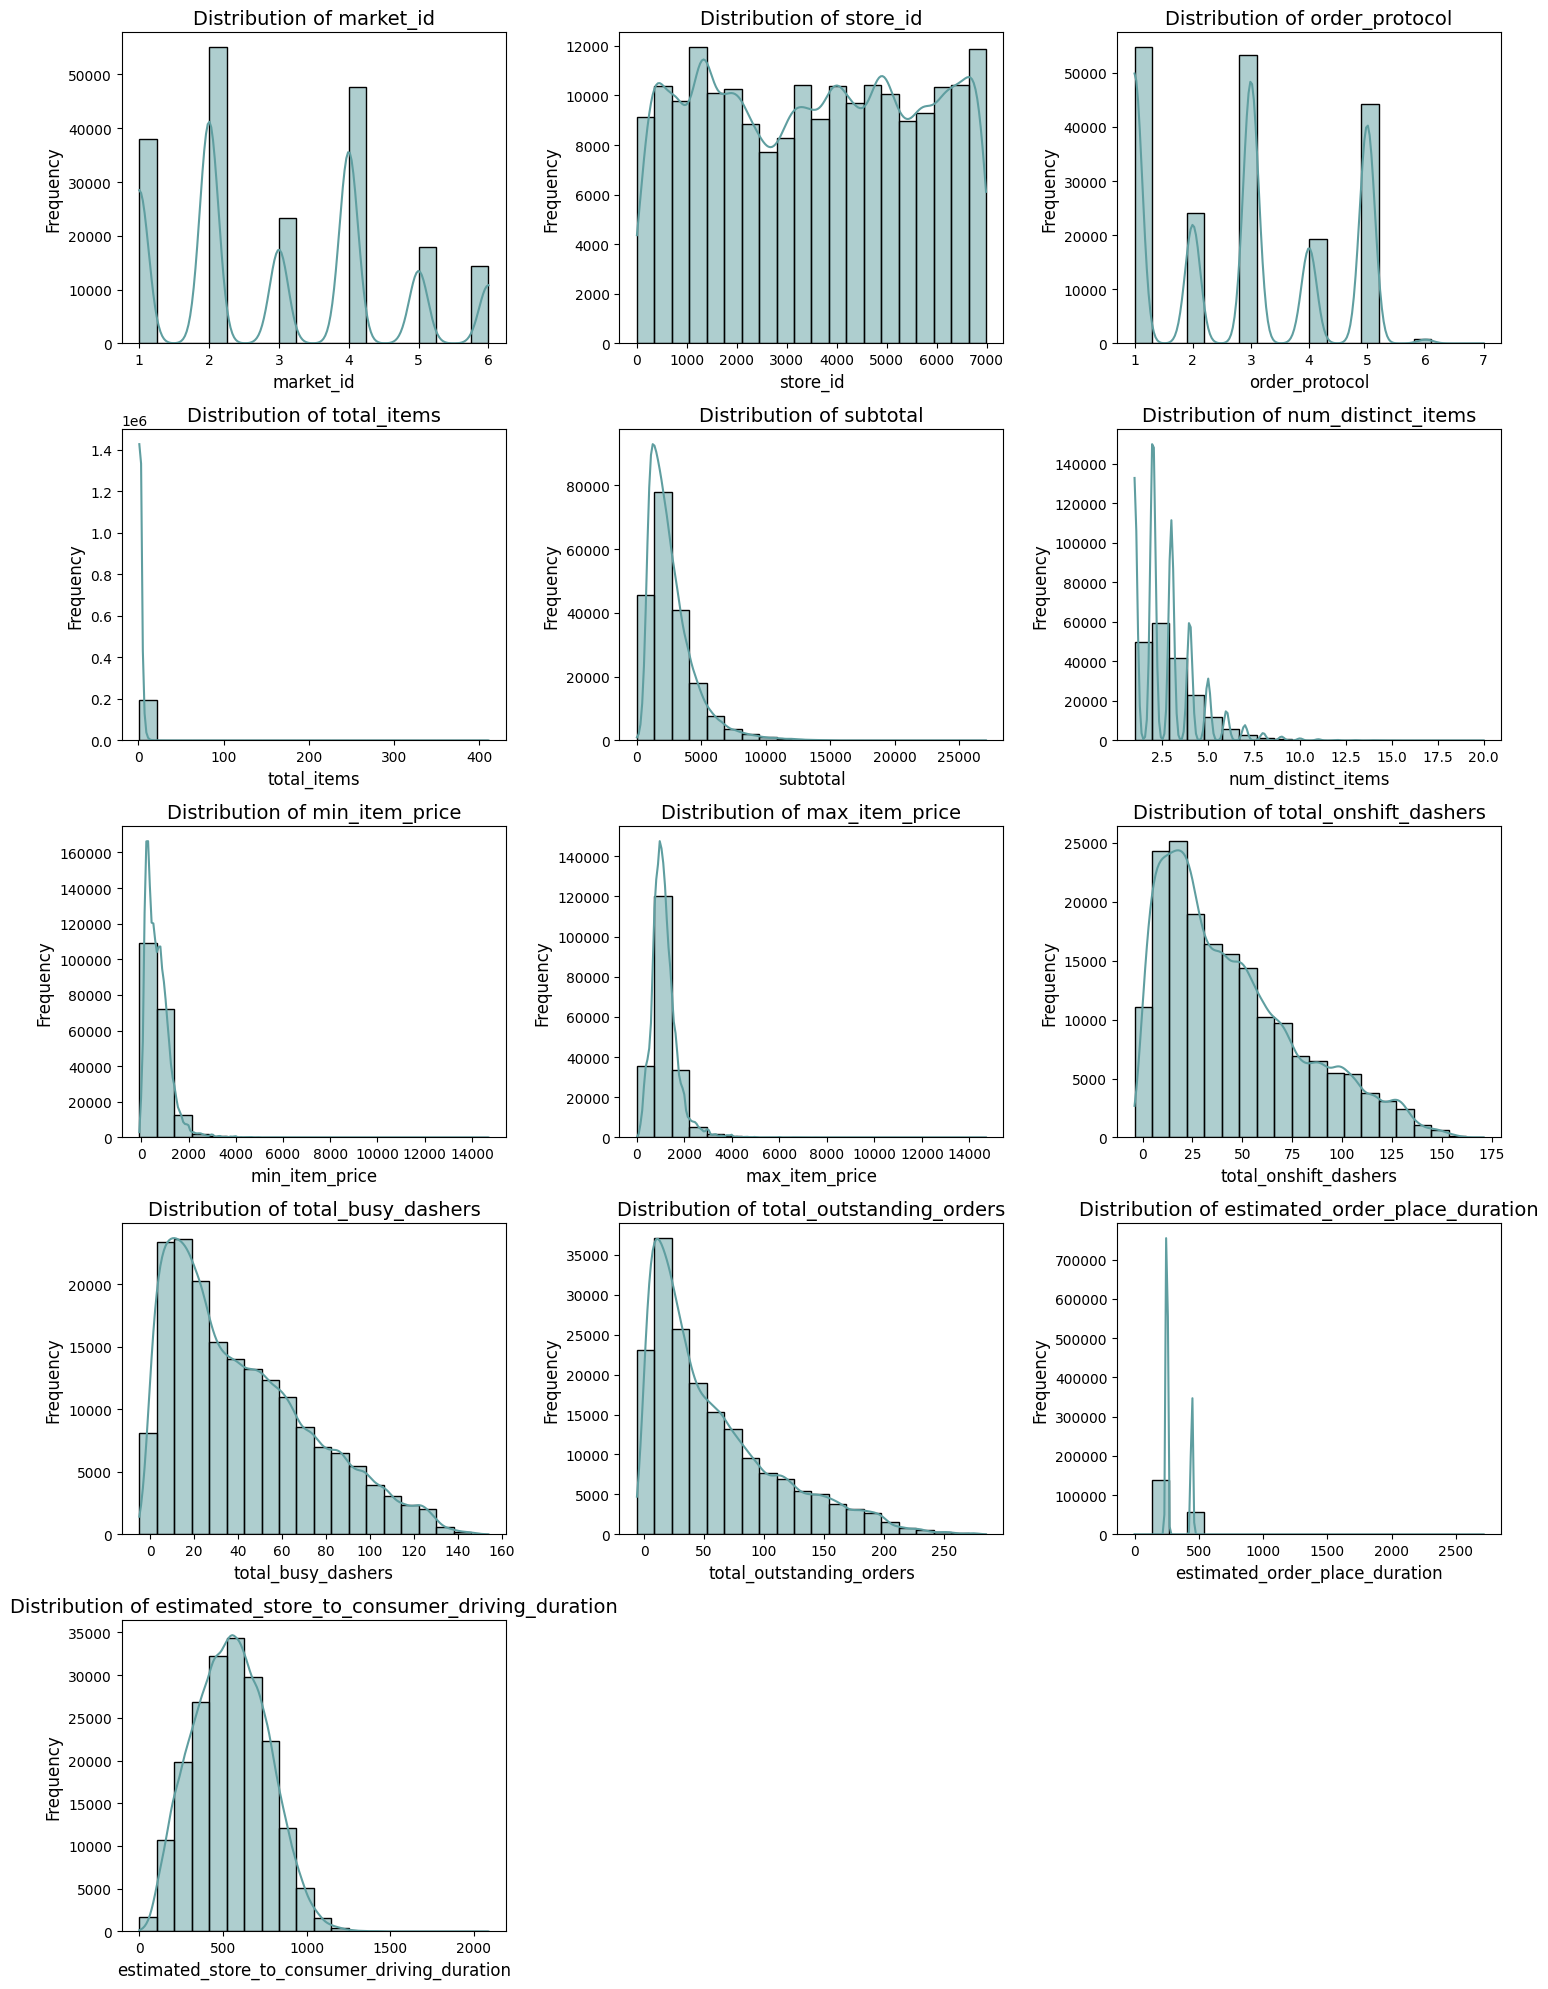

In [11]:
# Histograms for numerical columns

numerical_cols = df.select_dtypes(include=['int64', 'float64']).columns

if 'ID' in df.columns:
    df.drop(columns=['ID'], inplace=True, axis=1)

num_cols = len(numerical_cols)
rows = int(np.ceil(num_cols / 3))  
cols = min(3, num_cols)  
fig, axes = plt.subplots(rows, cols, figsize=(15, rows * 4))
axes = axes.flatten()  

for i, col in enumerate(numerical_cols):
    sns.histplot(df[col], bins=20, kde=True, color="cadetblue", edgecolor="black", ax=axes[i])
    axes[i].set_xlabel(col, fontsize=12)
    axes[i].set_ylabel("Frequency", fontsize=12)
    axes[i].set_title(f"Distribution of {col}", fontsize=14)

for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

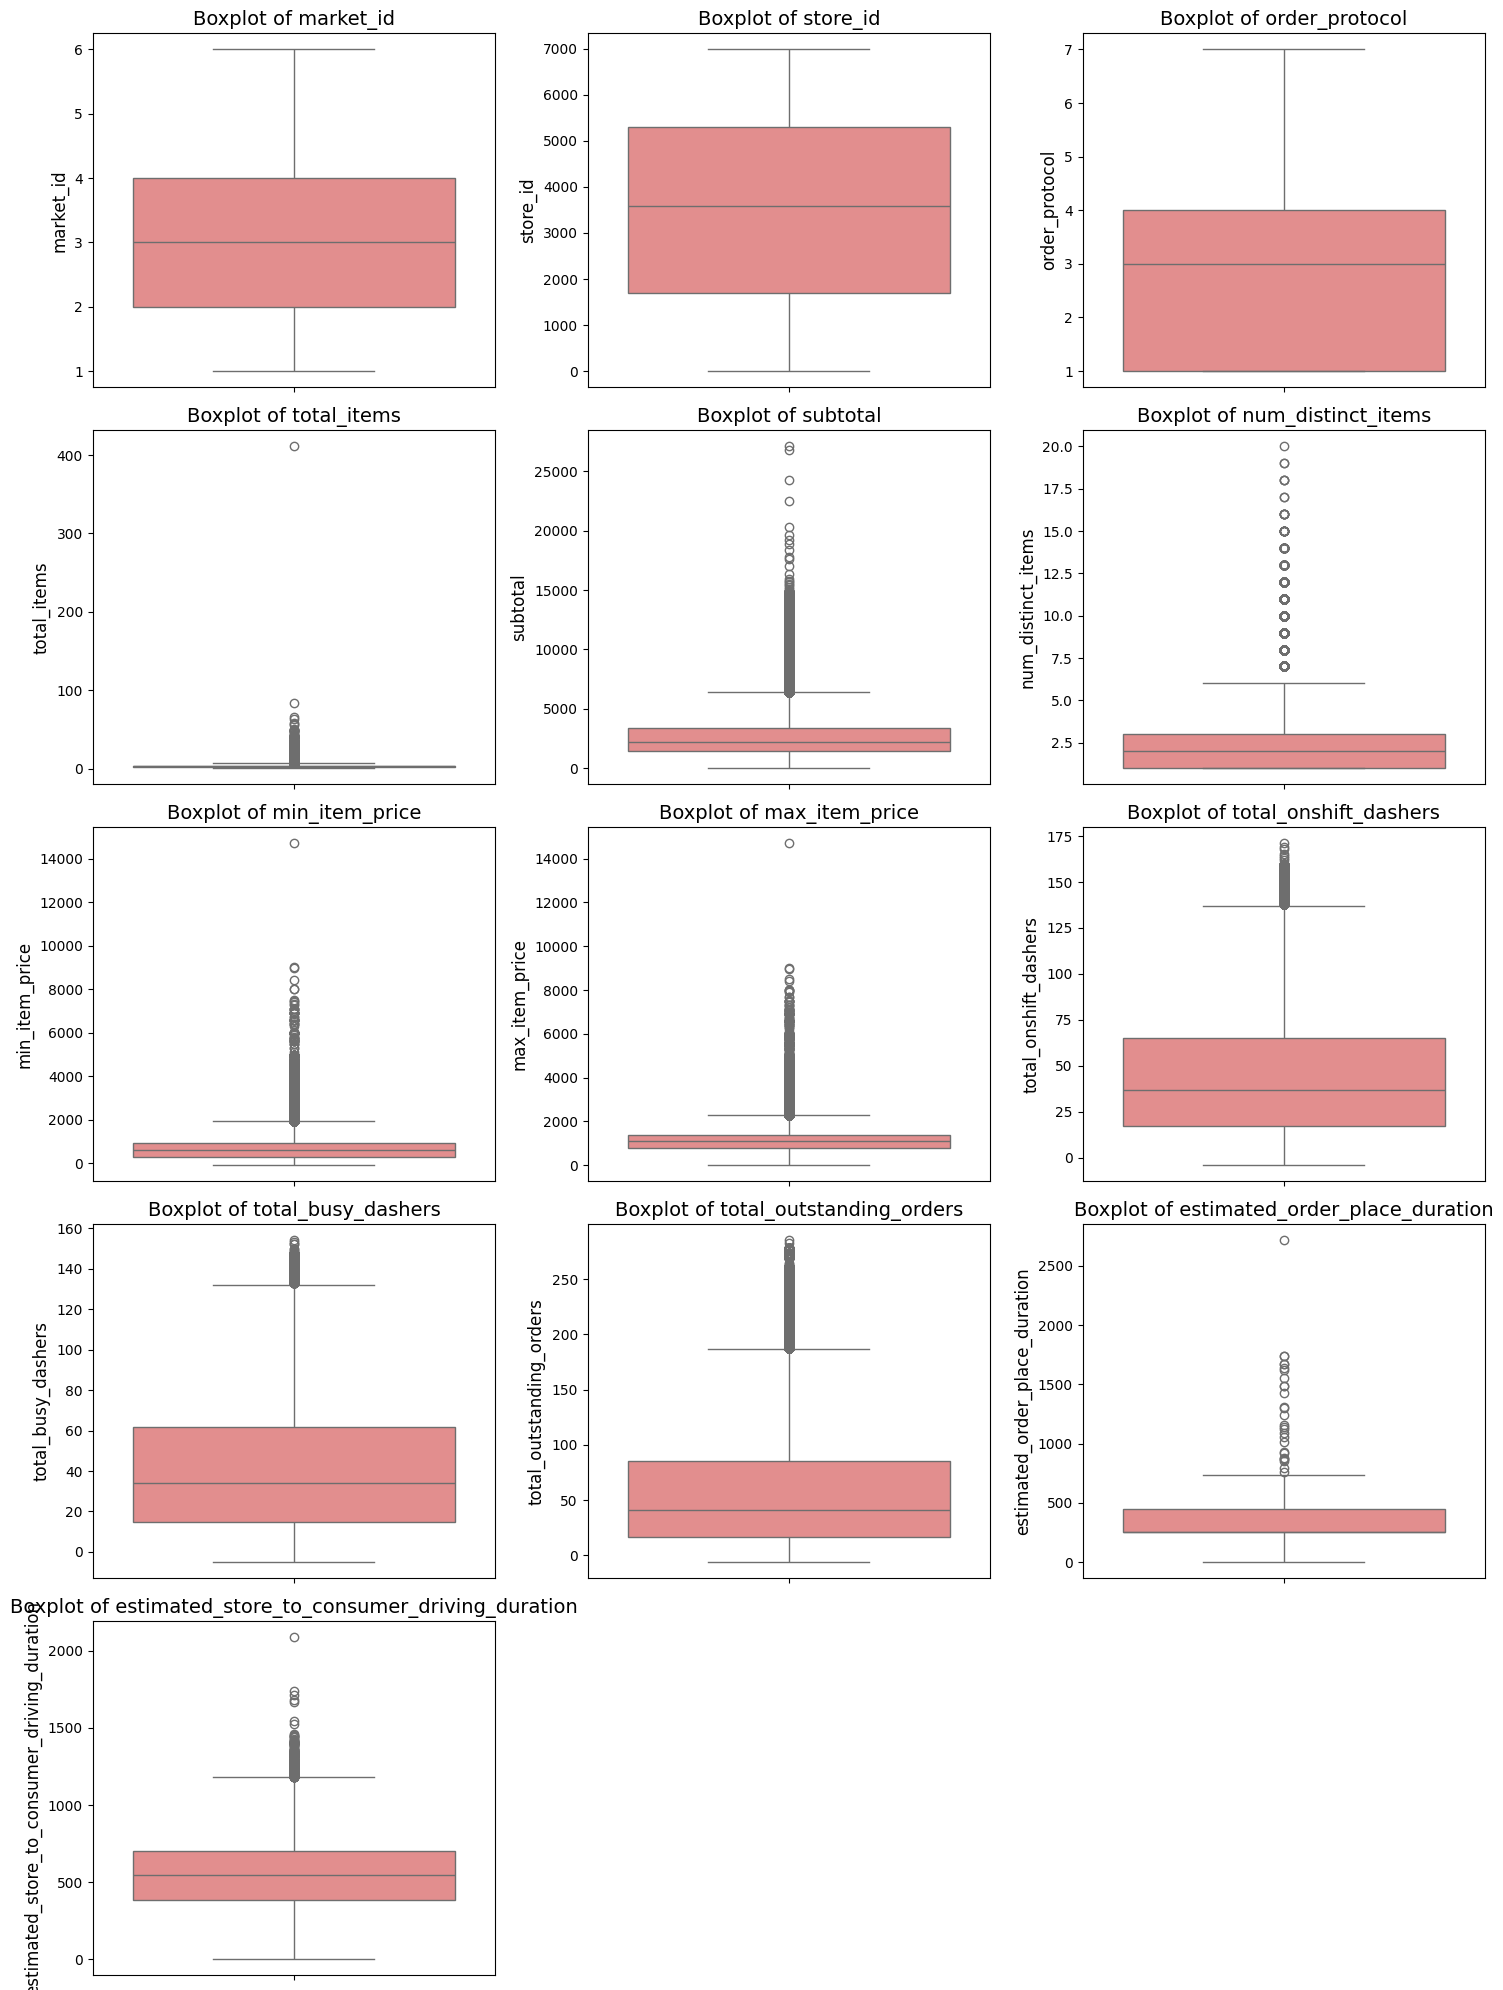

In [12]:
# Plotting each numerical column as a boxplot

numerical_cols = df.select_dtypes(include=['int64', 'float64']).columns

num_cols = len(numerical_cols)
rows = int(np.ceil(num_cols / 3))  
cols = min(3, num_cols)  
fig, axes = plt.subplots(rows, cols, figsize=(15, rows * 4))
axes = axes.flatten() 

for i, col in enumerate(numerical_cols):
    sns.boxplot(y=df[col], color="lightcoral", ax=axes[i])
    axes[i].set_ylabel(col, fontsize=12)
    axes[i].set_title(f"Boxplot of {col}", fontsize=14)

for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

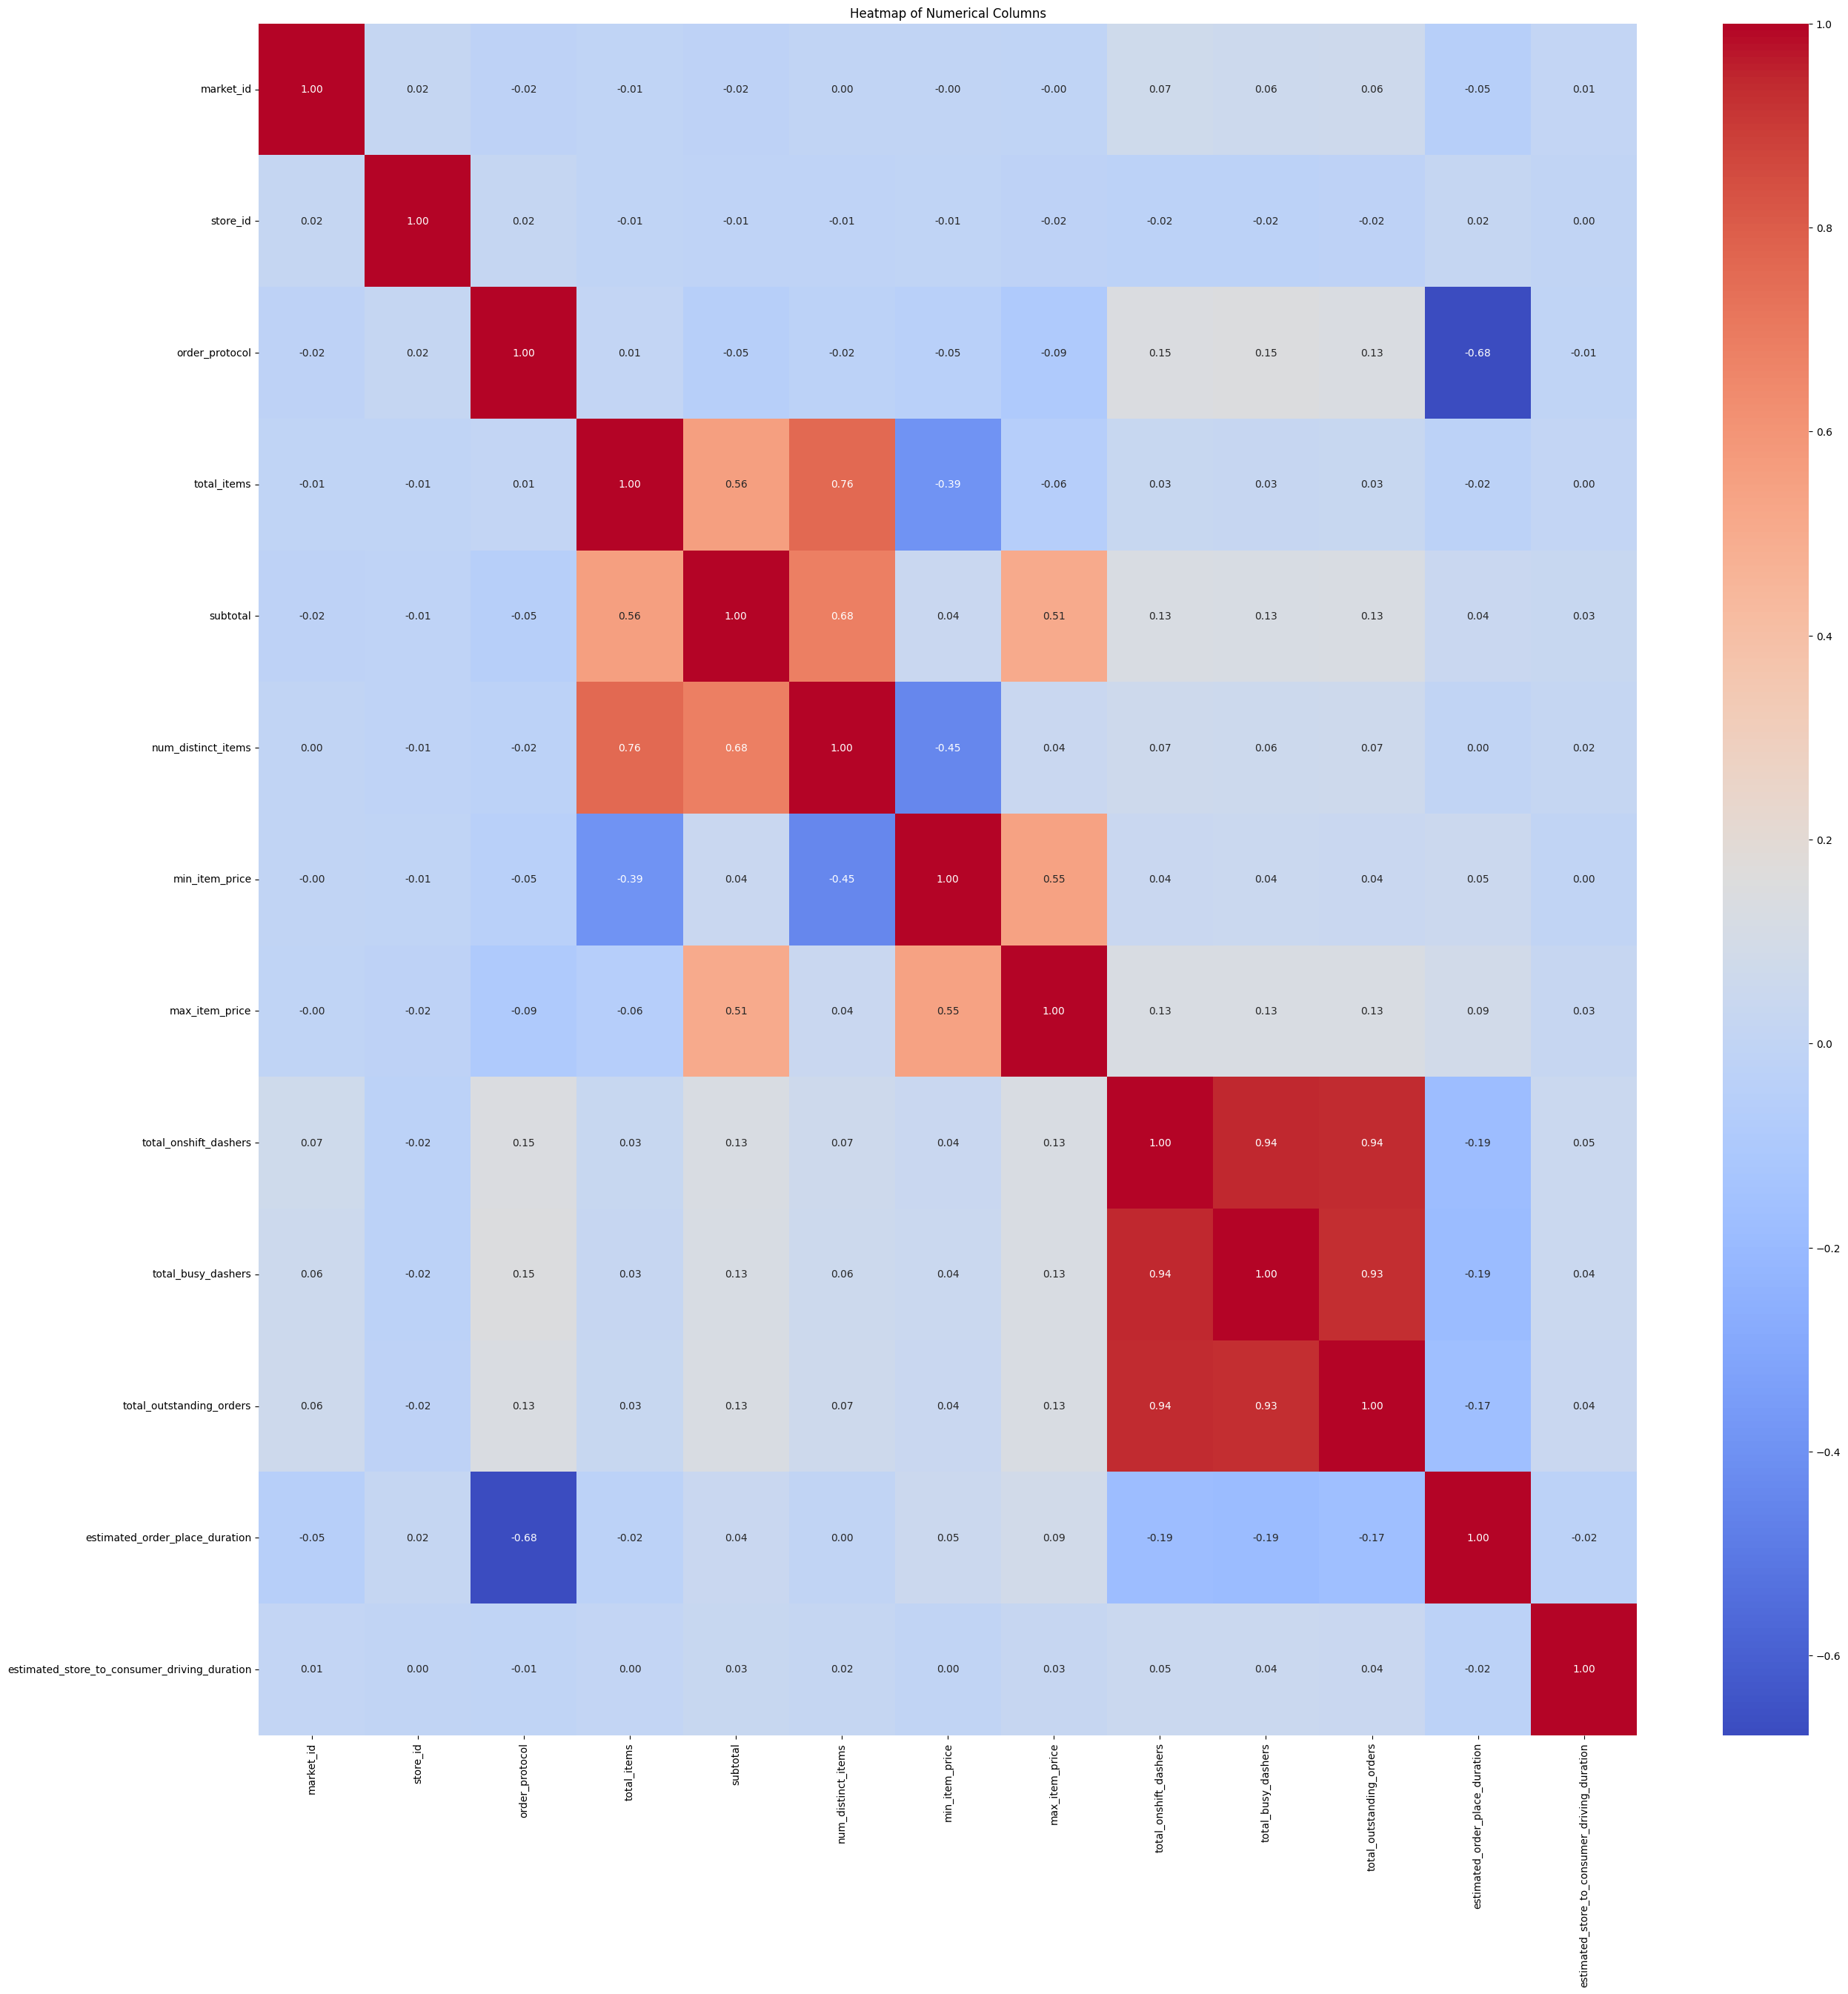

In [13]:
# Heatmap for numerical columns

numerical_columns = df.select_dtypes(include=['number'])

plt.figure(figsize=(30, 30))
sns.heatmap(numerical_columns.corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Heatmap of Numerical Columns')
plt.show()

## Data Preprocessing

In [22]:
# Convert datetime columns

import holidays

df['created_at'] = pd.to_datetime(df['created_at'])
df['actual_delivery_time'] = pd.to_datetime(df['actual_delivery_time'])
df['delivery_duration_minutes'] = (
    (df['actual_delivery_time'] - df['created_at']).dt.total_seconds() / 60
)

# Time-Based Features
df['hour'] = df['created_at'].dt.hour
df['day_of_week_num'] = df['created_at'].dt.dayofweek
df['is_weekend'] = df['day_of_week_num'].isin([5, 6]).astype(int)

# Holiday Indicator
us_holidays = holidays.US()
df['is_holiday'] = df['created_at'].dt.date.astype(str).isin(us_holidays).astype(int)


In [ ]:
# Custom Feature Engineering

def add_custom_features(data: pd.DataFrame) -> pd.DataFrame:
    # --- Dasher Features ---
    data['total_busy_dashers'] = data['total_busy_dashers'].abs()
    data['total_onshift_dashers'] = data['total_onshift_dashers'].abs()
    
    data['dashers_per_order'] = data['total_onshift_dashers'] / (data['total_outstanding_orders'] + 1e-5)
    
    data['%_dashers_avail'] = data['total_busy_dashers'] / (
        data['total_busy_dashers'] + data['total_onshift_dashers'] + 1e-5
    )

    # --- Price-Based Features ---
    data['price_range'] = data['max_item_price'] - data['min_item_price']
    data['avg_item_price'] = data['subtotal'] / (data['total_items'] + 1e-5)
    data['price_volatility'] = data['price_range'] / (data['avg_item_price'] + 1e-5)

    # --- Interaction Features ---
    data['order_intensity'] = data['total_outstanding_orders'] / (data['total_busy_dashers'] + 1e-5)
    data['delivery_difficulty'] = (
        data['order_intensity'] * data['estimated_store_to_consumer_driving_duration']
    )

    # --- Delivery Speed Feature (Proxy using historical average) ---
    data['historical_avg_delivery_time'] = data.groupby(
        ['store_id', 'hour']
    )['delivery_duration_minutes'].transform('mean')

    data['delivery_speed'] = data['historical_avg_delivery_time'] / (
        data['estimated_store_to_consumer_driving_duration'] / 60 + 1e-5
    )

    # --- Log Transformations ---
    data['log_subtotal'] = np.log1p(data['subtotal'])
    data['log_outstanding_orders'] = np.log1p(data['total_outstanding_orders'].clip(lower=1e-5))

    return data

df = add_custom_features(df)

In [24]:
# Dropping unnecessary columns

df = df.drop(columns=['created_at', 'actual_delivery_time'])

In [25]:
# Removing outliers

def remove_outliers_iqr(df, variables, threshold=1.5):
   
    for variable in variables:
        if variable in df.columns:
            Q1 = df[variable].quantile(0.25)
            Q3 = df[variable].quantile(0.75)
            IQR = Q3 - Q1
            lower_bound = Q1 - (threshold * IQR)
            upper_bound = Q3 + (threshold * IQR)
            df = df[(df[variable] >= lower_bound) & (df[variable] <= upper_bound)]
    return df

outlier_columns = [
    'subtotal', 'delivery_duration_minutes', 'max_item_price', 'price_range',
    'avg_item_price', 'price_volatility', 'delivery_speed'
]

df = remove_outliers_iqr(df, outlier_columns)

In [26]:
# Handling missing values

from sklearn.impute import KNNImputer

def handle_missing_values(df, n_neighbors=5):
    
    numeric_cols = df.select_dtypes(include=['float64', 'int64']).columns
    imputer = KNNImputer(n_neighbors=n_neighbors)
    df[numeric_cols] = imputer.fit_transform(df[numeric_cols])
    
    categorical_cols = df.select_dtypes(include=['object', 'category']).columns
    for col in categorical_cols:
        df[col] = df[col].fillna(df[col].mode()[0])
    
    return df

df = handle_missing_values(df)

In [27]:
# Label Encoding

from sklearn.preprocessing import LabelEncoder

def optimized_label_encoding(df, cat_cols):
    le_dict = {} 
    
    for col in cat_cols:
        le = LabelEncoder()
        df[col] = le.fit_transform(df[col].astype(str))
        le_dict[col] = le 
    
    return df, le_dict
    
categorical_columns = ['store_primary_category']
df, encoders = optimized_label_encoding(df, categorical_columns)

In [28]:
X = df.drop(columns=['delivery_duration_minutes'])
y = df['delivery_duration_minutes']

In [29]:
# Train Test Split

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [30]:
# Standard Scaler

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

## Model Building

In [31]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from sklearn.metrics import mean_absolute_error, mean_squared_error

In [ ]:
neural_model = Sequential([
    Dense(128, input_dim=X_train.shape[1], activation='relu'),
    Dropout(0.2),  
    Dense(64, activation='relu'),
    Dropout(0.2), 
    Dense(32, activation='relu'),  
    Dense(1, activation='linear')
])

In [33]:

neural_model.compile(optimizer='adam', loss='mean_squared_error', metrics=['mae'])

In [34]:
early_stopping = tf.keras.callbacks.EarlyStopping(
    monitor='val_loss',  
    patience=10,  
    restore_best_weights=True  
)

In [35]:
neural_model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 128)            │         3,840 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 14,209 (55.50 KB)

 Trainable params: 14,209 (55.50 KB)

 Non-trainable params: 0 (0.00 B)

In [36]:
history = neural_model.fit(
    X_train, y_train,
    validation_split=0.2,  
    epochs=50,  
    batch_size=32, 
    callbacks=[early_stopping]  
)

Epoch 1/50


I0000 00:00:1744393887.032286   20074 service.cc:148] XLA service 0x7b3de400a630 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
I0000 00:00:1744393887.032335   20074 service.cc:156]   StreamExecutor device (0): NVIDIA GeForce RTX 3060 Laptop GPU, Compute Capability 8.6
2025-04-11 23:21:27.054539: I tensorflow/compiler/mlir/tensorflow/utils/dump_mlir_util.cc:268] disabling MLIR crash reproducer, set env var `MLIR_CRASH_REPRODUCER_DIRECTORY` to enable.
I0000 00:00:1744393887.154192   20074 cuda_dnn.cc:529] Loaded cuDNN version 90300


  99/3133 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - loss: 1552.8273 - mae: 35.3250   

I0000 00:00:1744393887.753594   20074 device_compiler.h:188] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


3133/3133 ━━━━━━━━━━━━━━━━━━━━ 7s 2ms/step - loss: 286.1098 - mae: 11.8980 - val_loss: 112.2053 - val_mae: 8.1588
Epoch 2/50
3133/3133 ━━━━━━━━━━━━━━━━━━━━ 4s 1ms/step - loss: 129.4624 - mae: 8.7736 - val_loss: 112.2633 - val_mae: 8.0692
Epoch 3/50
3133/3133 ━━━━━━━━━━━━━━━━━━━━ 4s 1ms/step - loss: 123.6751 - mae: 8.5756 - val_loss: 116.5193 - val_mae: 8.1645
Epoch 4/50
3133/3133 ━━━━━━━━━━━━━━━━━━━━ 4s 1ms/step - loss: 120.1039 - mae: 8.4224 - val_loss: 109.0568 - val_mae: 8.0864
Epoch 5/50
3133/3133 ━━━━━━━━━━━━━━━━━━━━ 4s 1ms/step - loss: 117.2862 - mae: 8.3240 - val_loss: 111.1146 - val_mae: 8.0351
Epoch 6/50
3133/3133 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - loss: 116.1052 - mae: 8.2815 - val_loss: 110.6355 - val_mae: 8.0832
Epoch 7/50
3133/3133 ━━━━━━━━━━━━━━━━━━━━ 4s 1ms/step - loss: 114.8317 - mae: 8.2398 - val_loss: 111.0898 - val_mae: 8.0351
Epoch 8/50
3133/3133 ━━━━━━━━━━━━━━━━━━━━ 4s 1ms/step - loss: 113.9697 - mae: 8.1970 - val_loss: 110.6848 - val_mae: 8.0839
Epoch 9/50
3133/31

## Model Evaluation

In [37]:
y_pred = neural_model.predict(X_test)
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))

print(f"MAE: {mae:.2f}")
print(f"RMSE: {rmse:.2f}")

980/980 ━━━━━━━━━━━━━━━━━━━━ 1s 635us/step
MAE: 8.12
RMSE: 10.41
